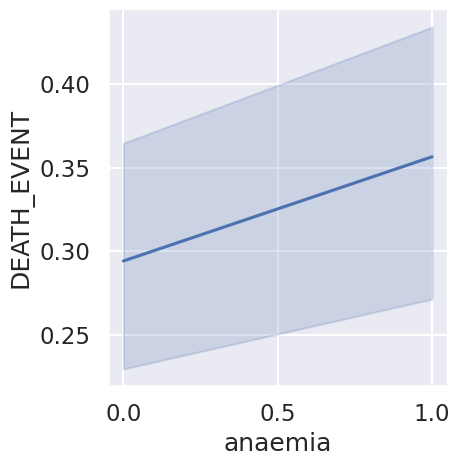

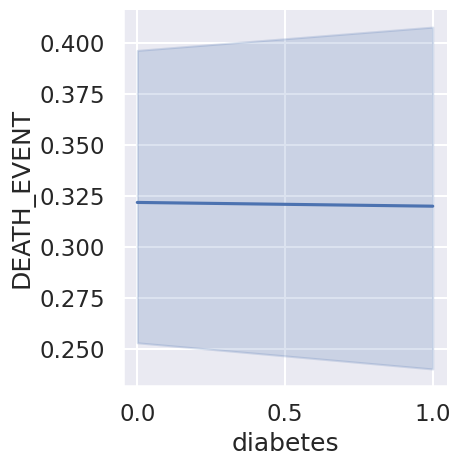

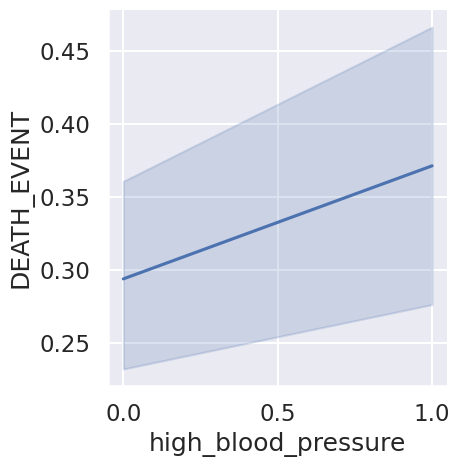

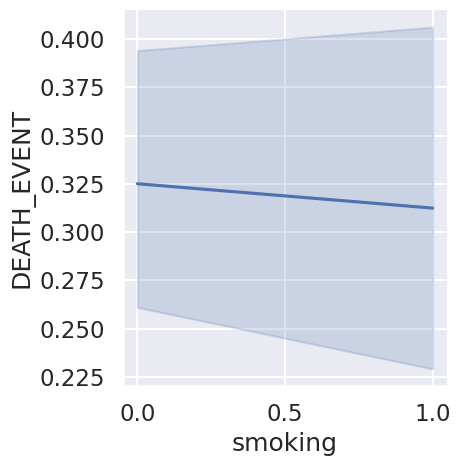

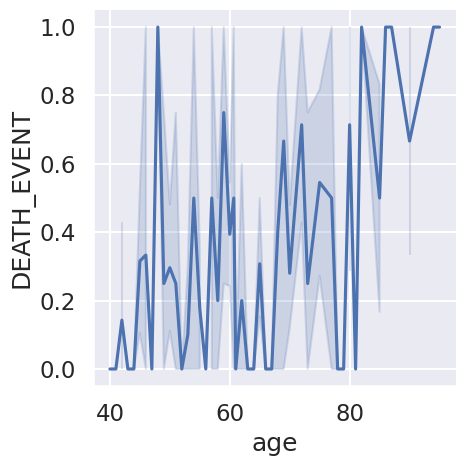

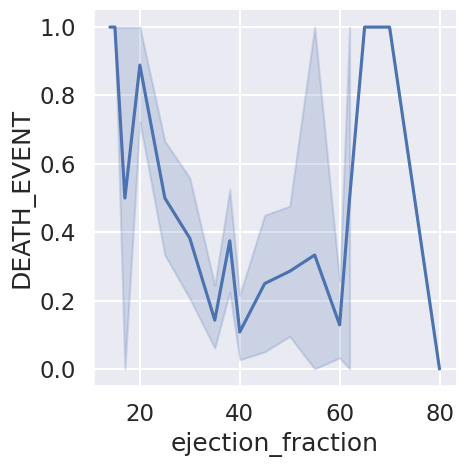

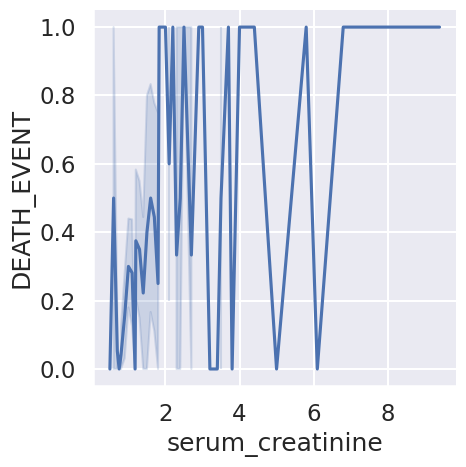

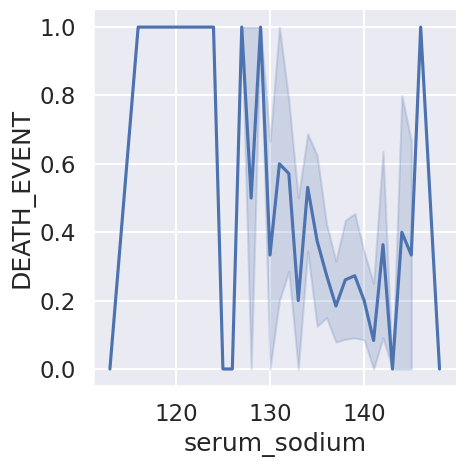

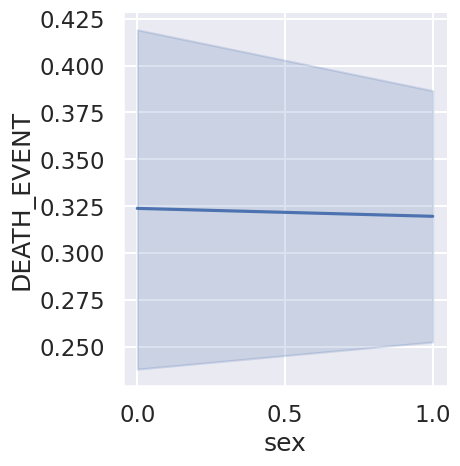

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Accuracy: 0.7333333333333333
Cross-Validation Scores: [0.76666667 0.7        0.83333333 0.76666667 0.83333333 0.9
 0.9        0.8        0.8        0.86206897]
Average Cross-Validation Score: 0.8162068965517241


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

Best Model: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7933444641596463
Accuracy (Best Hyperparameters): 0.8166666666666667
Confusion Matrix (Best Hyperparameters):
 [[34  1]
 [10 15]]
Classification Report (Best Hyperparameters):
               precision    recall  f1-score   support

           0       0.77      0.97      0.86        35
           1       0.94      0.60      0.73        25

    accuracy                           0.82        60
   macro avg       0.86      0.79      0.80        60
weighted avg       0.84      0.82      0.81        60



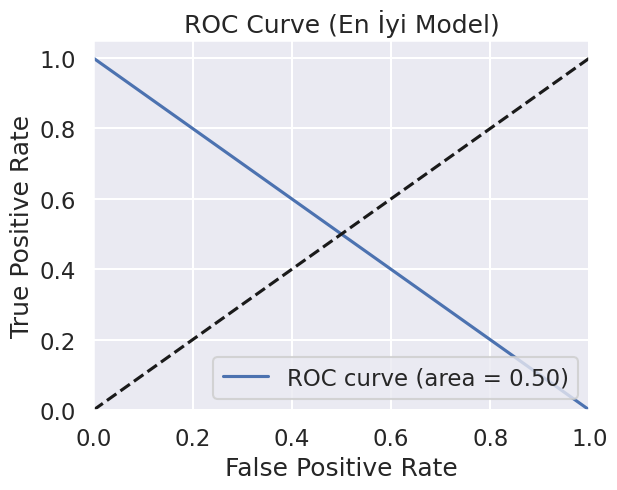

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression

#Kalp Krizi geçiren 299 hastanın 13 feature (özelliğe) göre toplanmış verilerini içeren veri seti
veri = pd.read_csv("/heart_failure_clinical_records_dataset.csv")
veri.head(10)

#Hangi değişkenlerin kalp krizi sonucu ölümü tetikleyebileceğinin tahmini ve uygun parametrelerin tespiti için ölüm oranları ile parametrelerin relation (alaka) grafiklerinin çizimi
sns.relplot(x="anaemia", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="diabetes", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="high_blood_pressure", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="smoking", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="age", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="ejection_fraction", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="serum_creatinine", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="serum_sodium", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

sns.relplot(x="sex", y="DEATH_EVENT", kind="line", data=veri)
plt.show()

#Uygun feature'lar tespit edildikten sonra makine öğrenmesi modeline uygun şekilde besleme yapılabilmesi için feature'ları binary ve continous olarak listelere ayırıyoruz

binary_features = ["anaemia", "diabetes", "high_blood_pressure", "smoking"]
continuous_features = ["age", "ejection_fraction", "serum_creatinine", "serum_sodium"]

#Continous feature'ların preprocessing'i için StandardScaler fonksiyonunu kullanarak Data Normalization yapıyoruz.
scaler = StandardScaler()
veri[continuous_features] = scaler.fit_transform(veri[continuous_features])

#Aynı işlemi binary feature'lar için gerçekleştiriyoruz.
encoder = OneHotEncoder(sparse=False, drop="first")
veri[binary_features] = encoder.fit_transform(veri[binary_features])

#Feature ve target değişkenlerini x ve y olarak kodluyoruz. X değişkeninden target değişkenini çıkarıyoruz ki değerler üst üste binerek yanlış tahminde bulunmaya neden olmasın.
X = veri.drop("DEATH_EVENT", axis=1)
y = veri["DEATH_EVENT"]

#Feature ve target değişkenlerimizi test edebilmek ve overfitting'in önüne geçmek için dağıtıyoruz
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Bu problem için en yüksek skoru veren model olan Logistic Regression modelini kullanıyoruz
model = linear_model.LogisticRegression()
#Hyperparameter tuning için GridSearchCV modülünü kullanacağız. Bunun için şimdiden optimize edilecek parametrelerin listesini hazırlıyoruz.
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs']
}
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Cross Validation yaparak modelin genelleme performansını görülmemiş veriler üzerinde arttırıyoruz.
cv = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=cv)

print("Cross-Validation Scores:", scores)
print("Average Cross-Validation Score:", scores.mean())

scoring = "f1_macro"

#Şimdi GridSearch ile hyperparameter oprimizasyonunu için modeli train ediyoruz
grid_search = GridSearchCV(model, param_grid, scoring=scoring, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Model: {best_model}")
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")

#GridSearch'in verdiği raporlar neticesinde önerdiği parametreler ile tekrardan modeli çalıştırıyoruz.
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy (Best Hyperparameters):", accuracy)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix (Best Hyperparameters):\n", confusion_matrix)

classification_report = classification_report(y_test, y_pred)
print("Classification Report (Best Hyperparameters):\n", classification_report)

#Son olarak Roc curve metriklerinin grafiği ile classification performansını da ölçüyoruz.
pr, tpr, thresholds = roc_curve(y_test, y_pred)
fpr = 1 - tpr
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (En İyi Model)')
plt.legend(loc="lower right")
plt.show()






